In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
df = pd.read_csv('HR.csv')
print(df.columns.values)
df.head()

['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years' 'sales' 'salary']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.describe

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2    

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [8]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

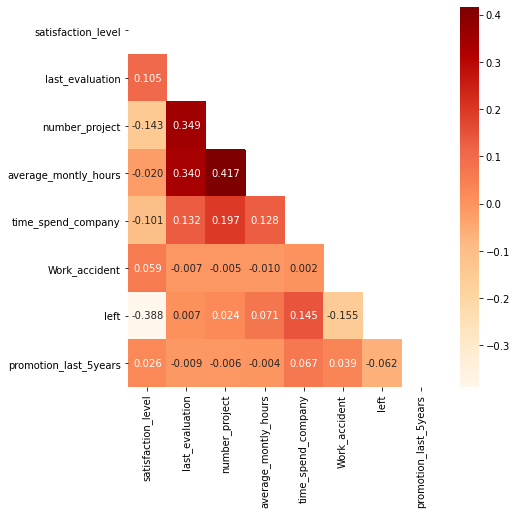

In [9]:
plt.subplots(figsize=(7, 7))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),annot = True,cmap="OrRd",mask=mask,fmt='.3f')

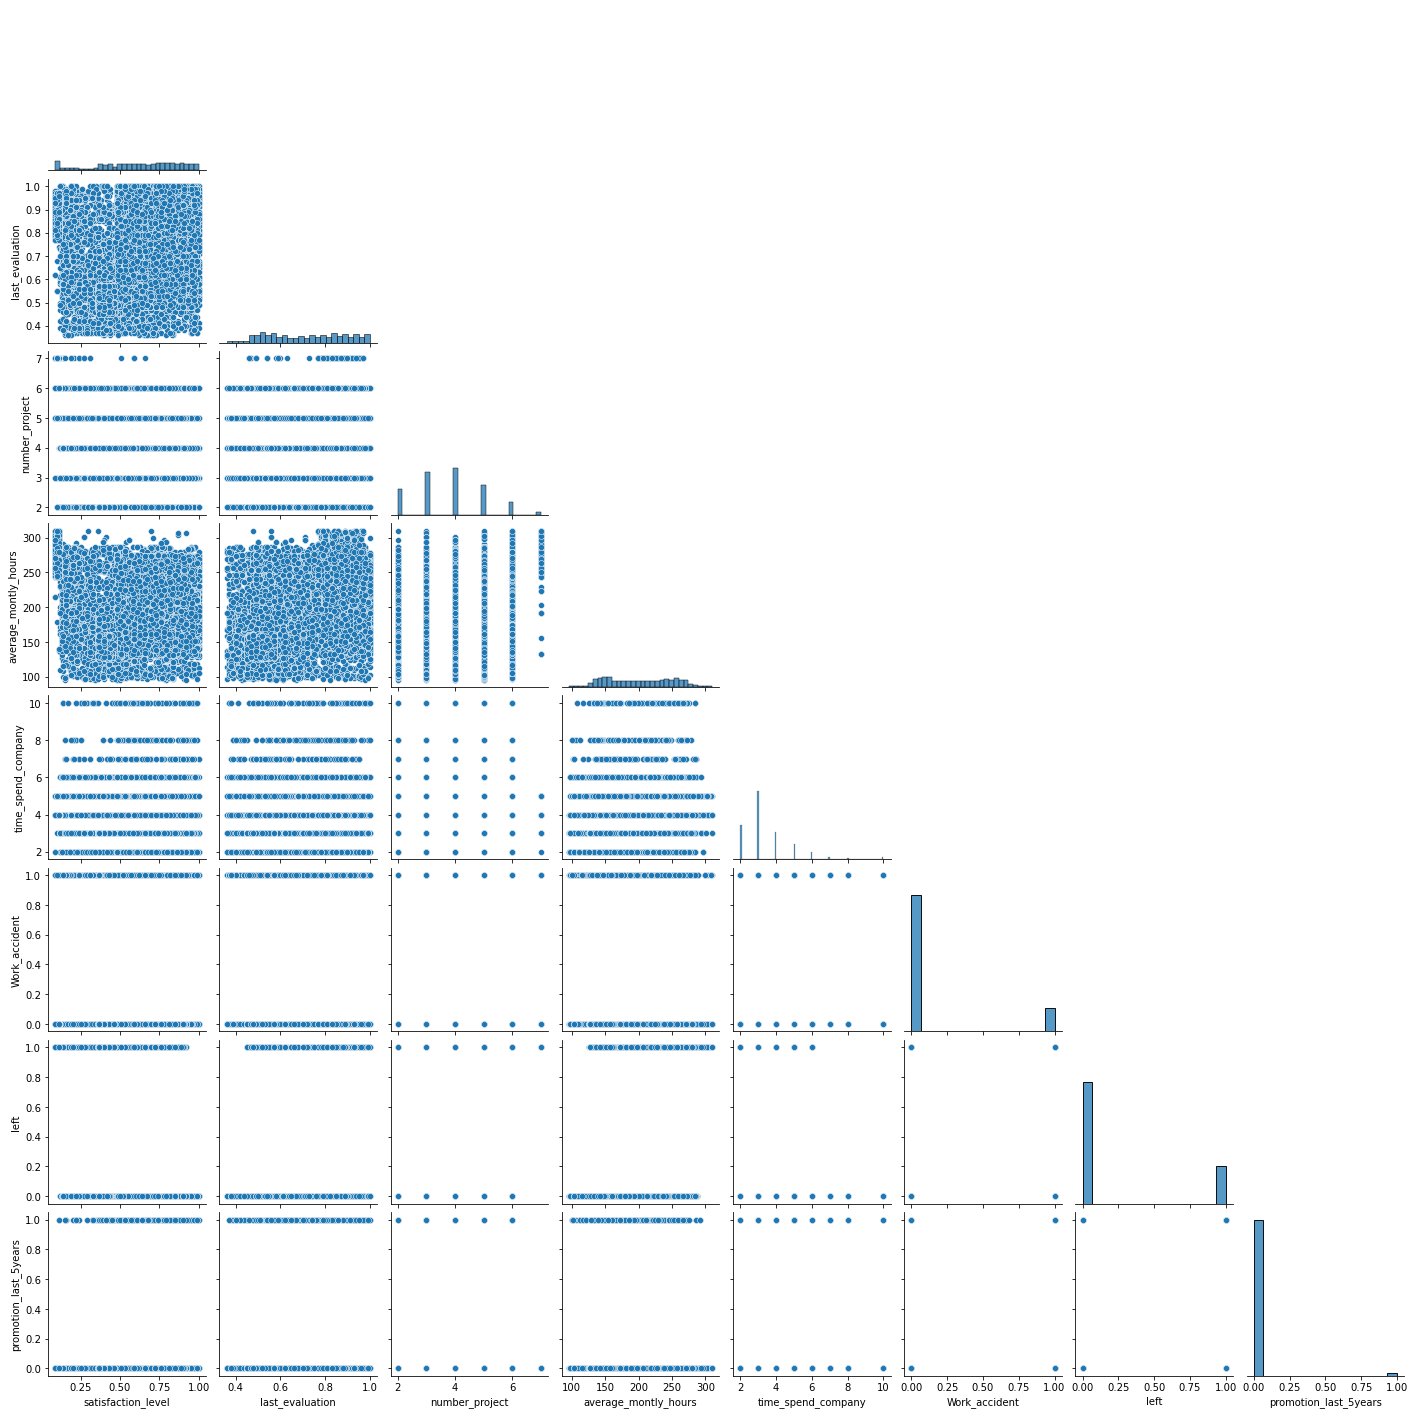

In [10]:
sns.pairplot(df,corner=True)

In [11]:
df2 = df.drop(['left','sales','salary'],axis=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df[df2.columns.values]=pd.DataFrame(sc.fit_transform(df2),columns = df2.columns.values)

In [13]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1,0.0,sales,low
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1,0.0,sales,medium
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1,0.0,sales,medium
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1,0.0,sales,low
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,1,0.0,support,low
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,1,0.0,support,low
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,1,0.0,support,low
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,1,0.0,support,low


In [14]:
# Rename sales feature into department
df = df.rename(columns={"sales": "Department"})

# Since Salary is an ordinal categorical feature. Map salary into integers based on the order 
smap = {"low": 0, "medium": 1, "high": 2}
df['salary'] = df['salary'].map(smap)

# Create dummy variables for department feature and drop the first column to remove redundancy
df = pd.get_dummies(df, columns=["Department"],drop_first=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1,0.0,0,0,0,0,0,0,0,1,0,0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1,0.0,1,0,0,0,0,0,0,1,0,0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1,0.0,1,0,0,0,0,0,0,1,0,0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1,0.0,0,0,0,0,0,0,0,1,0,0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1,0.0,0,0,0,0,0,0,0,1,0,0


In [15]:
df.shape

(14999, 18)

Take a look at the distribution of positive and negative samples in the dataset. So that we know if our dataset is balanced or imbalanced

Positive samples =  3571
Negative samples =  11428
Proportion of positive to negative samples = 31.25%


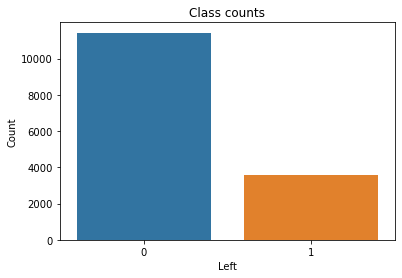

In [16]:
p,n = df[df["left"] == 1].shape[0],df[df["left"] == 0].shape[0]
print("Positive samples = ",p)
print("Negative samples = ",n)
print("Proportion of positive to negative samples = {:.2f}%".format((p/n) * 100))
sns.countplot(df["left"])
#plt.xticks((0, 1), ["Didn't leave", "Left"])
plt.xlabel("Left")
plt.ylabel("Count")
plt.title("Class counts");

As per the plot the minority class is the positive samples(left) and the majority class is negative samples(didn't leave)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#upsampling and downsampling to handle the imbalanced dataset
X = df.loc[:, df.columns != "left"].values
#since it's a column of data we are converting it from matrix to array
y = df.loc[:, df.columns == "left"].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Upsample the minority class(positive samples)
X_train_up, y_train_up = resample(X_train[y_train == 1],y_train[y_train == 1],replace=True,
                                  n_samples=X_train[y_train == 0].shape[0],random_state=1)
X_train_up,y_train_up = np.concatenate((X_train[y_train == 0], X_train_up)),np.concatenate((y_train[y_train == 0], y_train_up))

# Downsample the majority class(negative samples)
X_train_d, y_train_d = resample(X_train[y_train == 0],y_train[y_train == 0],replace=True,
                                n_samples=X_train[y_train == 1].shape[0],random_state=1)
X_train_d,y_train_d = np.concatenate((X_train[y_train == 1], X_train_d)),np.concatenate((y_train[y_train == 1], y_train_d))

print("Upsampled dataset shape:", X_train_up.shape, y_train_up.shape)
print("Original dataset shape:", X_train.shape, y_train.shape)
print("Downsampled dataset shape:", X_train_d.shape, y_train_d.shape)

Upsampled dataset shape: (18284, 17) (18284,)
Original dataset shape: (11999, 17) (11999,)
Downsampled dataset shape: (5714, 17) (5714,)


In [18]:
data = {"Original": (X_train, y_train),"Up": (X_train_up, y_train_up),"Down": (X_train_d, y_train_d)}

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

for i in data.keys():
    log = LogisticRegression()
    log.fit(data[i][0],data[i][1])
    print("accuracy: ",accuracy_score(y_test,log.predict(X_test)))
    cm=metrics.confusion_matrix(y_train,log.predict(X_train))
    print(cm)

accuracy:  0.7913333333333333
[[8504  638]
 [1857 1000]]
accuracy:  0.762
[[6803 2339]
 [ 585 2272]]
accuracy:  0.7623333333333333
[[6828 2314]
 [ 591 2266]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2286
           1       0.50      0.78      0.61       714

    accuracy                           0.76      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.76      0.78      3000



In [21]:
from sklearn.neighbors import KNeighborsClassifier

for i in data.keys():
    knn = KNeighborsClassifier()
    knn.fit(data[i][0],data[i][1])
    print("accuracy: ",accuracy_score(y_test,knn.predict(X_test)))
    cm=metrics.confusion_matrix(y_test,knn.predict(X_test))
    print(cm)

accuracy:  0.9486666666666667
[[2200   86]
 [  68  646]]
accuracy:  0.9436666666666667
[[2146  140]
 [  29  685]]
accuracy:  0.9003333333333333
[[2045  241]
 [  58  656]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2286
           1       0.73      0.92      0.81       714

    accuracy                           0.90      3000
   macro avg       0.85      0.91      0.87      3000
weighted avg       0.92      0.90      0.90      3000



In [23]:
from sklearn.svm import SVC

for i in data.keys():
    sv = SVC(probability=True)
    sv.fit(data[i][0],data[i][1])
    print("accuracy: ",accuracy_score(y_test,sv.predict(X_test)))
    cm=metrics.confusion_matrix(y_test,sv.predict(X_test))
    print(cm)

accuracy:  0.9456666666666667
[[2200   86]
 [  77  637]]
accuracy:  0.9376666666666666
[[2147  139]
 [  48  666]]
accuracy:  0.9283333333333333
[[2123  163]
 [  52  662]]


In [24]:
print(classification_report(y_test, sv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2286
           1       0.80      0.93      0.86       714

    accuracy                           0.93      3000
   macro avg       0.89      0.93      0.91      3000
weighted avg       0.93      0.93      0.93      3000



In [25]:
import xgboost as xgb

for i in data.keys():
    xgbc = xgb.XGBClassifier()
    xgbc.fit(data[i][0],data[i][1])
    print("Accuracy: ",accuracy_score(y_test,xgbc.predict(X_test)))
    cm=metrics.confusion_matrix(y_test,xgbc.predict(X_test))
    print(cm)

[13:32:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.9873333333333333
[[2273   13]
 [  25  689]]
[13:32:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.9866666666666667
[[2270   16]
 [  24  690]]
[13:32:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.978
[[2236   50]
 [  16  698]]


In [26]:
print(classification_report(y_test, xgbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2286
           1       0.93      0.98      0.95       714

    accuracy                           0.98      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [27]:
from sklearn.tree import DecisionTreeClassifier

for i in data.keys():
    dt = DecisionTreeClassifier()
    dt.fit(data[i][0],data[i][1])
    print("Accuracy: ",accuracy_score(y_test,dt.predict(X_test)))
    cm=metrics.confusion_matrix(y_test,dt.predict(X_test))
    print(cm)

Accuracy:  0.9826666666666667
[[2252   34]
 [  18  696]]
Accuracy:  0.981
[[2247   39]
 [  18  696]]
Accuracy:  0.949
[[2146  140]
 [  13  701]]


In [28]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      2286
           1       0.83      0.98      0.90       714

    accuracy                           0.95      3000
   macro avg       0.91      0.96      0.93      3000
weighted avg       0.96      0.95      0.95      3000



In [29]:
from sklearn.ensemble import GradientBoostingClassifier

for i in data.keys():
    gb = GradientBoostingClassifier()
    gb.fit(data[i][0],data[i][1])
    print("accuracy: ",accuracy_score(y_test,gb.predict(X_test)))
    cm=metrics.confusion_matrix(y_test,gb.predict(X_test))
    print(cm)

accuracy:  0.9776666666666667
[[2264   22]
 [  45  669]]
accuracy:  0.9706666666666667
[[2233   53]
 [  35  679]]
accuracy:  0.9683333333333334
[[2225   61]
 [  34  680]]


In [30]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.95      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [31]:
from sklearn.ensemble import RandomForestClassifier

for i in data.keys():
    rf = RandomForestClassifier()
    rf.fit(data[i][0],data[i][1])
    print("accuracy: ",accuracy_score(y_test,rf.predict(X_test)))
    cm=metrics.confusion_matrix(y_test,rf.predict(X_test))
    print(cm)

accuracy:  0.9923333333333333
[[2282    4]
 [  19  695]]
accuracy:  0.9926666666666667
[[2283    3]
 [  19  695]]
accuracy:  0.9873333333333333
[[2267   19]
 [  19  695]]


In [32]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.97      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



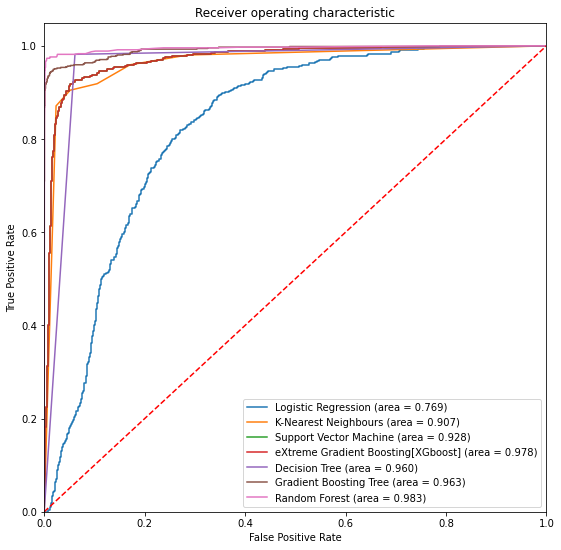

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(y_test, log.predict(X_test))
log_fpr, log_tpr, thresholds = roc_curve(y_test, log.predict_proba(X_test)[:,1])
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
sv_roc_auc = roc_auc_score(y_test, sv.predict(X_test))
sv_fpr, sv_tpr, thresholds = roc_curve(y_test, sv.predict_proba(X_test)[:,1])
xgb_roc_auc = roc_auc_score(y_test, xgbc.predict(X_test))
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=[9,9])
plt.plot(log_fpr, log_tpr, label='Logistic Regression (area = %0.3f)' % log_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbours (area = %0.3f)' % knn_roc_auc)
plt.plot(sv_fpr, sv_tpr, label='Support Vector Machine (area = %0.3f)' % sv_roc_auc)
plt.plot(sv_fpr, sv_tpr, label='eXtreme Gradient Boosting[XGboost] (area = %0.3f)' % xgb_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.3f)' % dt_roc_auc)
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting Tree (area = %0.3f)' % gb_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [34]:
rf.feature_importances_

array([0.27957533, 0.12369863, 0.13652003, 0.16217195, 0.24870272,
       0.01111115, 0.00174793, 0.01373024, 0.00182819, 0.00203778,
       0.00224328, 0.00253353, 0.00132716, 0.00110326, 0.00403709,
       0.00334783, 0.00428388])

In [35]:
feature_importance = rf.feature_importances_
dff = df.drop(['left'],axis=1)
feature_names = dff.columns.values
feature_importance,feature_names

(array([0.27957533, 0.12369863, 0.13652003, 0.16217195, 0.24870272,
        0.01111115, 0.00174793, 0.01373024, 0.00182819, 0.00203778,
        0.00224328, 0.00253353, 0.00132716, 0.00110326, 0.00403709,
        0.00334783, 0.00428388]),
 array(['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years', 'salary', 'Department_RandD',
        'Department_accounting', 'Department_hr', 'Department_management',
        'Department_marketing', 'Department_product_mng',
        'Department_sales', 'Department_support', 'Department_technical'],
       dtype=object))

Text(0, 0.5, 'Feature Names')

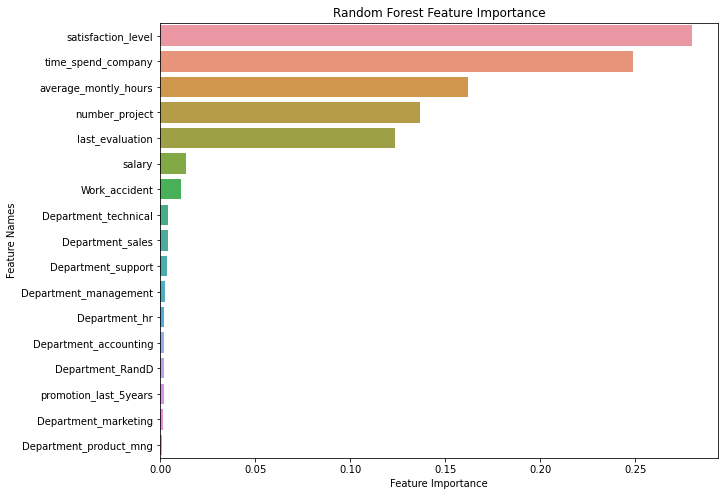

In [36]:
#Create a DataFrame using a Dictionary
imp_data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(imp_data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')